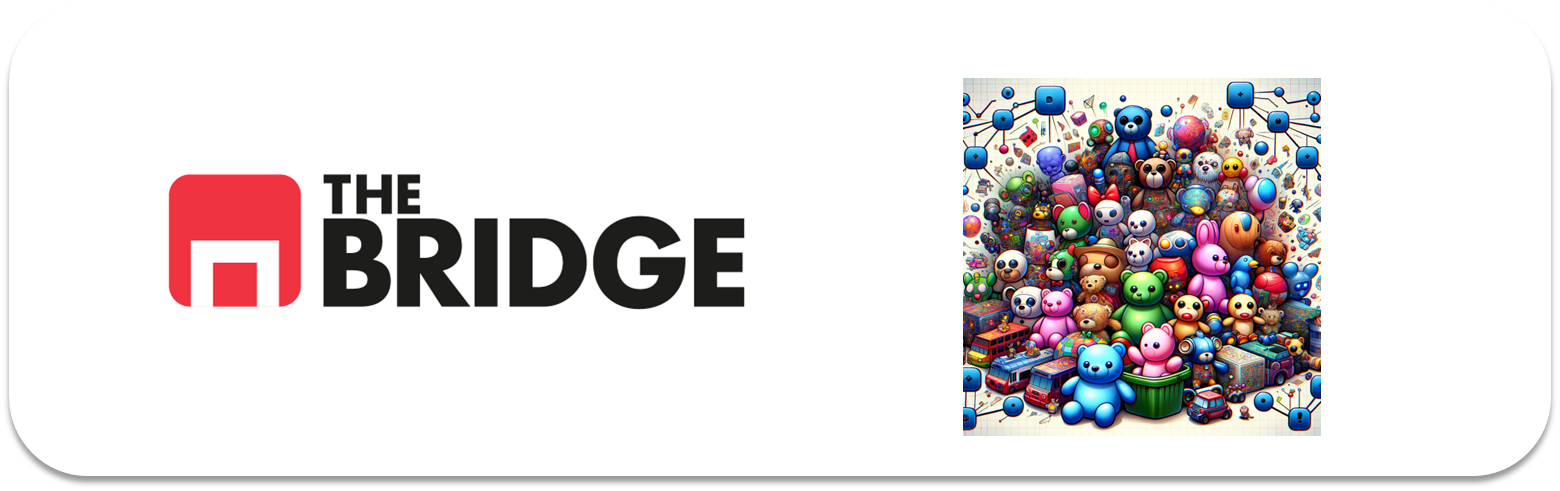

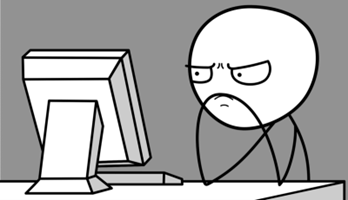

## PRACTICA OBLIGATORIA: K-MEANS

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [28]:
import pandas as pd
import numpy as np 
from sklearn.datasets import fetch_olivetti_faces 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [2]:
olivetti_caras = fetch_olivetti_faces()

print(olivetti_caras.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [3]:
data = olivetti_caras.data
target = olivetti_caras.target
print('El target es:')
print(target)
print()
df_caras= pd.DataFrame(data)
df_caras['target'] = target 
df_caras_ale = df_caras.sample(frac=1, random_state=42).reset_index(drop=True)
print('El DataFrame con las filas "barajadas":')
df_caras_ale.head(5)

El target es:
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.198347,0.235537,0.351240,0.409091,0.421488,0.429752,0.500000,0.528926,0.524793,0.553719,...,0.508264,0.524793,0.504132,0.483471,0.471074,0.285124,0.061983,0.128099,0.090909,20
1,0.185950,0.128099,0.115702,0.132231,0.185950,0.268595,0.433884,0.541322,0.570248,0.586777,...,0.396694,0.409091,0.301653,0.421488,0.462810,0.247934,0.190083,0.210744,0.210744,28
2,0.508264,0.603306,0.619835,0.628099,0.657025,0.665289,0.690083,0.727273,0.743802,0.768595,...,0.301653,0.305785,0.314050,0.326446,0.338843,0.330579,0.334711,0.342975,0.342975,3
3,0.136364,0.140496,0.185950,0.280992,0.318182,0.363636,0.409091,0.417355,0.438017,0.454545,...,0.169421,0.206612,0.276859,0.355372,0.685950,0.661157,0.280992,0.371901,0.276859,21
4,0.652893,0.644628,0.652893,0.706612,0.714876,0.719008,0.743802,0.747934,0.747934,0.756198,...,0.074380,0.074380,0.082645,0.082645,0.111570,0.070248,0.086777,0.185950,0.231405,9


### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es uan práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

In [4]:
train_df, temporal_df = train_test_split(df_caras_ale, test_size=0.2, random_state=21) #Divido mi DataFrame en 2, uno de train con el 80% de los datos y uno temporal con el 20%

val_df, test_df = train_test_split(temporal_df, test_size=0.5, random_state=21) #El DataFrame temporal lo divido en 2 al 50% (la mitad de 20 es 10)



Comprobamos el reparto:

In [5]:

lineas_totales = len(df_caras_ale) 
train_esp = int(lineas_totales*0.8)
test_esp = int(lineas_totales*0.1)
val_esp = int(lineas_totales*0.1)
print(f"El dataframe del que partimos tiene {lineas_totales} lineas")
print('Buscamos un reparto 80-10-10, por lo que:')
print(f"El train debería tener {train_esp} lineas")
print(f"El test debería tener {test_esp} lineas")
print(f"El conjunto de validacion debería tener {val_esp} lineas")
print()
train_real = len(train_df)
test_real = len(test_df)
val_real = len(val_df)
print('Tras hacer la particion vemos que:')
print(f"El train tiene {train_real} lineas")
print(f"El test tiene {test_real} lineas")
print(f"El conjunto de validacion tiene {val_real} lineas") 
print()
print('¿Está bien hecho el reparto?')
if train_esp == train_real and test_esp == test_real and val_esp == val_real:
    print('Si, está bien repartido.')
else: 
    print('No, no lo está')


El dataframe del que partimos tiene 400 lineas
Buscamos un reparto 80-10-10, por lo que:
El train debería tener 320 lineas
El test debería tener 40 lineas
El conjunto de validacion debería tener 40 lineas

Tras hacer la particion vemos que:
El train tiene 320 lineas
El test tiene 40 lineas
El conjunto de validacion tiene 40 lineas

¿Está bien hecho el reparto?
Si, está bien repartido.


### #1.4

Crea los pares X,y para train, validation y test.

In [6]:
#esto es basicamente lo mismo que hemos hecho hasta ahora, pero con un paso más, el de validación.
X_train = train_df.drop(columns='target')
y_train = train_df['target'] 

X_test = test_df.drop(columns='target')
y_test = test_df['target'] 

X_val = val_df.drop(columns='target')
y_val = val_df['target'] 



Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [7]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

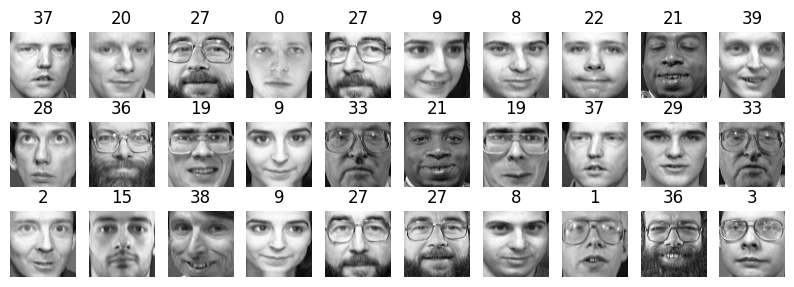

In [8]:

porcion_X = X_train.iloc[10:40]  #seleccionamos las lineas  que queremos del DataFrame, entre 10 y 40 poque si, sin más.
porcion_y = y_train.iloc[10:40] 

array_x = porcion_X.to_numpy() #Convertimos en array de numpy, esto lo se porque si no se hacia daba error.


plot_faces(array_x, porcion_y, n_cols=10)

### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [9]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

pca.n_components_

220

### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

In [10]:
best_score = -1
best_k = None 
k_values = range(5, 151, 5) #151 porque el ultimo no entra.
silhouette_scores = []

for k in k_values: 
    kmeans = KMeans(n_clusters=k, random_state=21)
    kmeans.fit(X_train_pca)
    silhouette_avg = silhouette_score(X_train_pca,kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    #print("Para n_clusters =", k, "La puntuacion media de las siluetases :", silhouette_avg)
    
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k

print("La mejor puntuacion para la silueta fue con k =", best_k, "y la puntuación fue", best_score)

La mejor puntuacion para la silueta fue con k = 120 y la puntuación fue 0.2118378


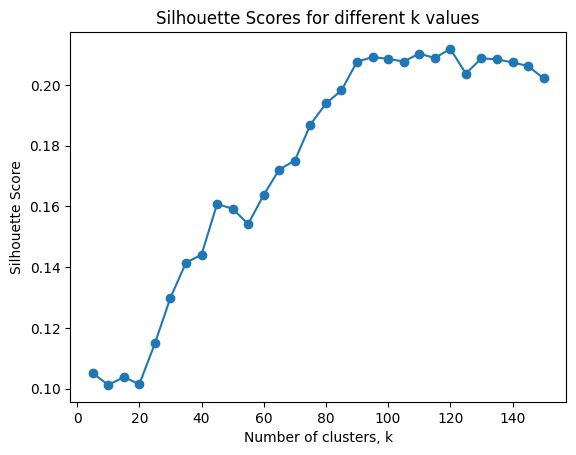

In [11]:
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different k values')
plt.show()


### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

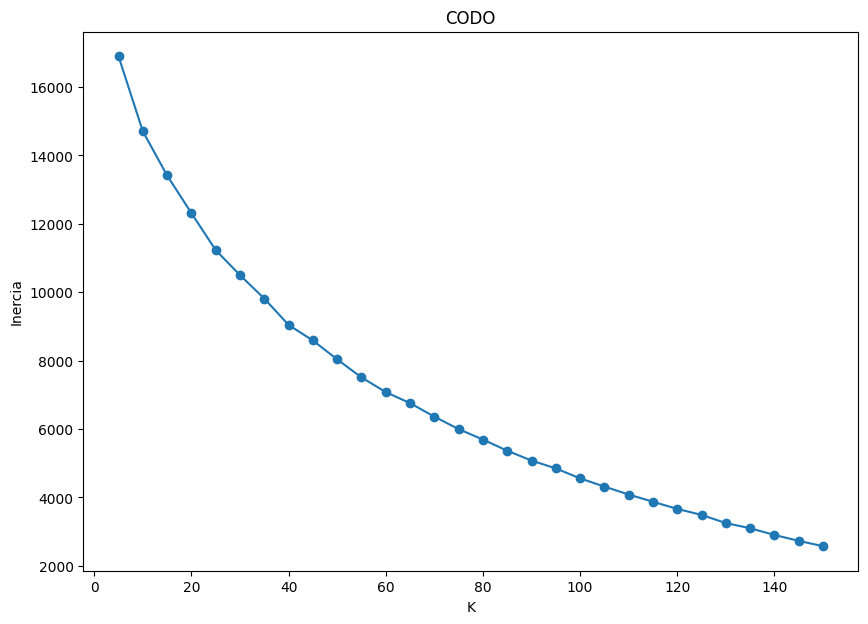

In [12]:
wcss = []
k_values_codo = range(5, 151, 5) #igual que antes
for k in k_values_codo:
    kmeans = KMeans(n_clusters=k, random_state=21, n_init=10)
    kmeans.fit(X_train_pca)
    wcss.append(kmeans.inertia_)  # La inercia es WCSS

# Graficar la inercia para visualizar el método del codo
plt.figure(figsize=(10, 7))
plt.plot(range(5, 151, 5), wcss, marker='o')
plt.title('CODO')
plt.xlabel('K')
plt.ylabel('Inercia')
plt.grid(False)
plt.show()

>No hay un codo obvio.

### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [13]:
best_model = KMeans(n_clusters=best_k, random_state=21)
best_model.fit(X_train_pca)

KMeans(n_clusters=120, random_state=21)

### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

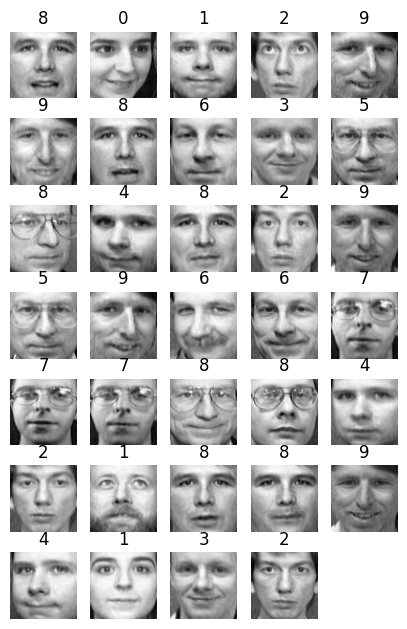

In [27]:

# Aplicar la transformación inversa a las imágenes originales
X_train_original = pca.inverse_transform(X_train_pca)

# Obtener las etiquetas de los clusters para las imágenes de entrenamiento
labels_train = best_model.labels_

# Filtrar las caras asignadas a los primeros 10 clusters
first_10_clusters = np.unique(labels_train)[:10]

# Filtrar las caras correspondientes a los primeros 10 clusters
faces_first_10_clusters = X_train_original[np.isin(labels_train, first_10_clusters)]

# Visualizar las caras asignadas a los primeros 10 clusters
plot_faces(faces_first_10_clusters, labels_train[np.isin(labels_train, first_10_clusters)])


## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

In [30]:
clasificador_bosque= RandomForestClassifier(n_estimators=150)
clasificador_bosque.fit(X_train, y_train)


y_pred = clasificador_bosque.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print("La accuracy del RandomForest en el dataframe de validación es:", accuracy)

La accuracy del RandomForest en el dataframe de validación es: 0.95


### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)